In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image
from model import LeNet

In [4]:
transform = transforms.Compose(
        [transforms.Resize((32, 32)),
         transforms.ToTensor(),
         transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

In [5]:
classes = ('plane', 'car', 'bird', 'cat',
               'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

加载训练好的参数

In [6]:
net = LeNet()
net.load_state_dict(torch.load('Lenet.pth'))

<All keys matched successfully>

当前文件夹中放入一张照片进行预测

In [7]:
im = Image.open('1.jpg')  # 载入图像
im = transform(im)  # [C, H, W] 
im = torch.unsqueeze(im, dim=0)  # [N, C, H, W] 放入网络进行正向传播需要正确的格式

In [8]:
with torch.no_grad():
    outputs = net(im)
    predict = torch.max(outputs, dim=1)[1].numpy()
print(classes[int(predict)])

plane


预测成功

torch中尺寸的问题  (N,C,H,W)  批次大小、层数、高度、宽度
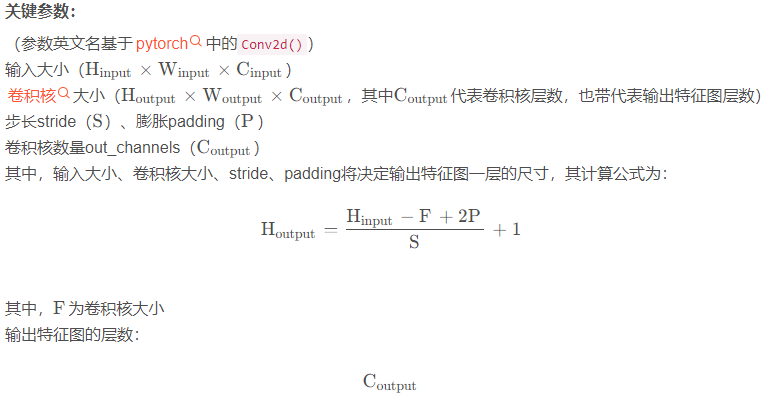